# E-tivity 3: : Linear Classification

## Student Name: Garret Molloy
## Student ID: 9021906

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Task 3 (CE6002)
- Create your own implementation of linear classification to perform a classification of the dataset provided in the Etivity3_LinearClassification.ipynb notebook without adding extra features to those provided. Use normal linear regression with sign(wTx) to obtain a classification. Notebook Etivity3_LinearClassification.ipynb is available in the git repository. Add your code to this notebook.4
- Observe your results and explain why these results seem disappointing (record your thoughts in a Markdown cell in your notebook).
- Now choose suitable new features and use these in your linear classification algorithm to improve the classification performance. Observe and explain (use plots where appropriate) why the classification performance has improved. Try a few different ones and note the differences!
- Also, use scikit-learn’s Logistic Regression algorithm and compare the performance with your algorithm. It is useful to spend some time thinking about the difference in approach taken in Logistic Regression.


#### Algorithm
1. Craete Matrix X and Vector y
2. Compute Psuedo Inverse
3. w = Xty


In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
X.shape

(1000, 2)

In [4]:
X[0]

array([0.30703081, 0.90085999])

In [5]:
y[0]

-1

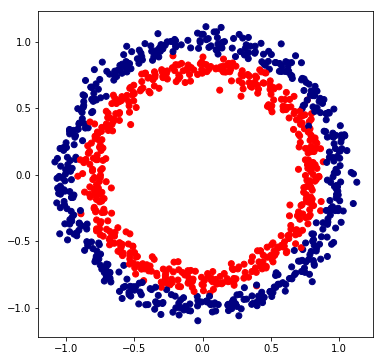

In [6]:
# Set colours based on the y values 1 & -1 
colors = ['red' if label == 1 else 'navy' for label in y]
fig = plt.figure(frameon=False)
fig.set_size_inches(6,6)
plt.scatter(X[:,0], X[:,1], color=colors) 
plt.show() 

In [7]:
# Add Bias to input features
shape = X.shape
new_X = np.ones((shape[0],shape[1]+1))
new_X[:,1:] = X

In [8]:
new_X.shape

(1000, 3)

In [9]:
new_X[0]

array([1.        , 0.30703081, 0.90085999])

In [10]:
# Split the data in to train and test (80/20 split) and ensure the data is shuffled.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2, shuffle=True)

In [11]:
X_train[0]

array([ 1.        , -0.47695265,  0.87225112])

In [12]:
y_train[0]

-1

In [13]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [14]:
# Homemade Linear Regression from scratch - didn't think I could do it!!
from numpy.linalg import inv

def linear_regression(X, y):
    # X dagger = Psuedo Inverse =        (Xt * X)^-1 * Xt
    psuedo_inverse = np.matmul(inv(np.matmul(X.T, X)), X.T)    
    # return w = X dagger * Xt
    return np.matmul(psuedo_inverse, y) # return w

In [15]:
weights = linear_regression(X_train, y_train)

In [16]:
weights

array([-0.00227433, -0.00869999, -0.0094714 ])

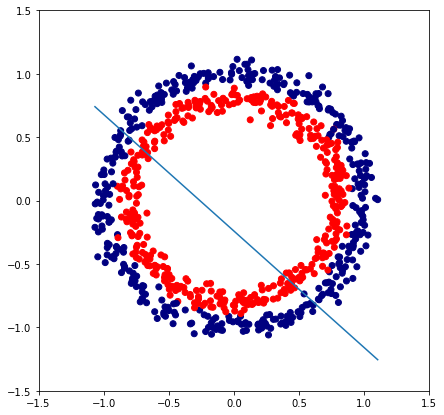

In [17]:
x_min = min(X_train[:,1])
x_max = max(X_train[:,1])
y_min,y_max = decision_boundary(weights, x_min, x_max)

colors_train = ['red' if label == 1 else 'navy' for label in y_train]

fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.ylim(-1.5,1.5)
plt.xlim(-1.5,1.5)
plt.scatter(X_train[:,1],X_train[:,2], color=colors_train)
plt.plot([x_min, x_max], [y_min, y_max])
plt.show()

In [58]:
# To Add Classificaiton - I need to get the sign of the value predicted
# So Now I have the chsen weights from Linear Regression I can use these for my predictions
# using the X_test data

def linear_classification(x,w):
    #print("Shape w = ", w.shape, "Shape X = ", x.shape)
    #Linear Classificaion is the sign of the dot product of weights(transposed) and input vector eights
    # its sgn determines the class allocation
    return np.sign(w.T.dot(x))

In [59]:
result_colors = []

for x,y in zip(X_test, y_test):
    if(linear_classification(x,weights)==y):
        if(y==1):
            result_colors = np.append(result_colors, 'red')
        else:
            result_colors = np.append(result_colors, 'navy')
    else:
        if(y==1):
            result_colors = np.append(result_colors, 'orange')
        else:
            result_colors = np.append(result_colors, 'grey')
    

In [20]:
result_colors.shape

(200,)

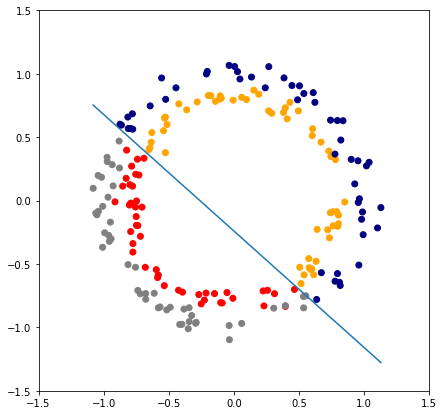

In [21]:
x_min = min(X_test[:,1])
x_max = max(X_test[:,1])
y_min,y_max = decision_boundary(weights, x_min, x_max)

fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.ylim(-1.5,1.5)
plt.xlim(-1.5,1.5)
plt.scatter(X_test[:,1],X_test[:,2], color=result_colors)
plt.plot([x_min, x_max], [y_min, y_max], )
plt.show()

In [22]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (linear_classification(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

In [23]:
eout = calc_error(X_test, y_test, weights)
print("Eout =", eout)

Eout = 0.52


I created the Linear Regression function to create the final weights for my training data of 800 samples.

I used these chosen weights with my Linear Classificaion algorithm to check how well these wegiths worked for predicting the correct values.

We can see visually that the data in in two circles, and know intuitively that the data is not linearly separable.

The line chosen for regression and used for classification split the data in two, and therefore we would only have half correct and half incorrect values, as the line cannot accurately follow the curved border required for a circular separation.



### To Improve the Linear Classification

From the material, I know if I transform the data so that it can be linearly separable I will be able to separate/classifiy the data correctly using linear classificaiton.

I will add to the features to mot be influenced by Data Snooping and there by invalidate the VC bound.

In [24]:
# Transform the Data to help make it linearly separable

# X_train has bias, x1 and x2
X_train.shape

(800, 3)

In [25]:
X_train[56]

array([ 1.        ,  0.86822771, -0.20115403])

In [26]:
# Here I am adding new features to the above
# x1 * x2, x1**2 and x2**2
X_train_transformed = np.asarray([(bias, x1, x2, x1 * x2, x1**2, x2**2) for (bias, x1, x2) in X_train])
X_test_transformed = np.asarray([(bias, x1, x2, x1 * x2, x1**2, x2**2) for (bias, x1, x2) in X_test])


In [27]:
X_train_transformed.shape

(800, 6)

In [28]:
X_train_transformed[56]

array([ 1.        ,  0.86822771, -0.20115403, -0.17464751,  0.75381935,
        0.04046295])

In [29]:
new_weights = linear_regression(X_train_transformed, y_train)

In [30]:
def point_on_boundary2(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[4]*x)/weights[5]

def decision_boundary2(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary2(weights, x_min), point_on_boundary2(weights, x_max)]

For analysis I chose the minimum number of dsuitable features to be able to plt: <b>x1<sup>2</sup></b> and <b>x2<sup>2</sup></b>

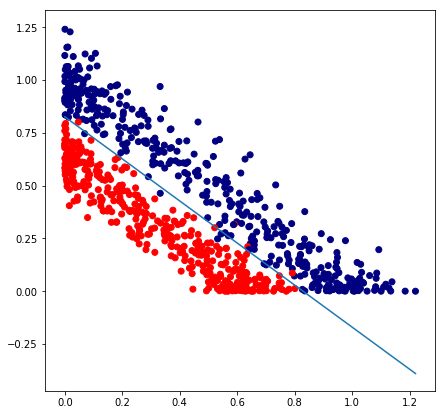

In [31]:
# Let's plot the data
x_min = min(X_train_transformed[:,4])
x_max = max(X_train_transformed[:,4])
y_min,y_max = decision_boundary2(new_weights, x_min, x_max)

colors_train = ['red' if label == 1 else 'navy' for label in y_train]

fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_train_transformed[:,4],X_train_transformed[:,5], color=colors_train)
plt.plot([x_min, x_max], [y_min, y_max], )
plt.show()

The squared values of the coordinates seems to have done the trick on the training data, the linear separation seems an excellent match to split/classify the data corrrectly after chsing the wegihts frmo the linear regression method.

We now need to see the results on the <b>out of sample data</b> with these weights


In [34]:
new_result_colors = []
print(X_test_transformed.shape)
print(len(y_test))

for x,y in zip(X_test_transformed, y_test):
    if(linear_classification(x,new_weights)==y):
        if(y==1):
            new_result_colors = np.append(new_result_colors, 'red')
        else:
            new_result_colors = np.append(new_result_colors, 'navy')
    else:
        if(y==1):
            new_result_colors = np.append(new_result_colors, 'orange')
        else:
            new_result_colors = np.append(new_result_colors, 'grey')
    

(200, 6)
200


In [35]:
new_result_colors.shape

(200,)

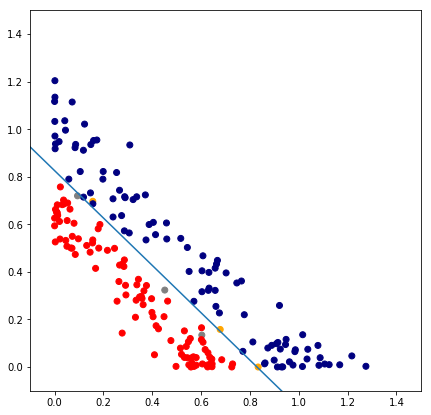

In [42]:
x_min = min(X_test_transformed[:,1])
x_max = max(X_test_transformed[:,1])
y_min,y_max = decision_boundary2(new_weights, x_min, x_max)

fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_test_transformed[:,4],X_test_transformed[:,5], color=new_result_colors)
plt.plot([x_min, x_max], [y_min, y_max])
plt.xlim(-.1,1.5)
plt.ylim(-.1,1.5)
plt.show()

In [44]:
new_eout = calc_error(X_test_transformed, y_test, new_weights)
print("Eout =", new_eout, "  compared to old Eout =", eout)

Eout = 0.03   compared to old Eout = 0.52


## Compare to LogisticRegression Method from Scikit Learn 

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train_transformed, y_train)

predictions = model.predict(X_test_transformed)

score = model.score(X_test_transformed, y_test)
print(score)

0.975


In [47]:
print("Logistic Regression Eout = {:6.3f}, compared to my Linear Classification Eout = {}".format(1-score, new_eout))

Logistic Regression Eout =  0.025, compared to my Linear Classification Eout = 0.03


Let's plot the Logistic Regression

In [49]:
model_result_colors = []

for x,y in zip(X_test_transformed, y_test):
    if(model.predict(x.reshape(1, -1))==y):
        if(y==1):
            model_result_colors = np.append(model_result_colors, 'red')
        else:
            model_result_colors = np.append(model_result_colors, 'navy')
    else:
        if(y==1):
            model_result_colors = np.append(model_result_colors, 'orange')
        else:
            model_result_colors = np.append(model_result_colors, 'grey')
    

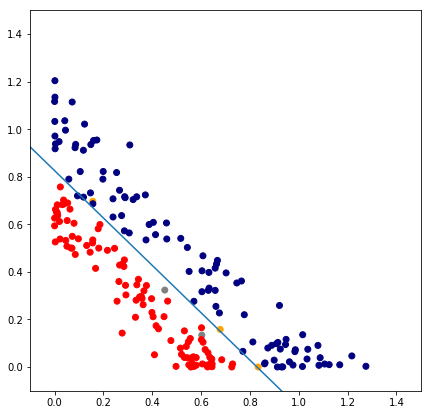

In [51]:
x_min = min(X_test_transformed[:,1])
x_max = max(X_test_transformed[:,1])

fig = plt.figure(frameon=False)
fig.set_size_inches(7,7)
plt.scatter(X_test_transformed[:,4],X_test_transformed[:,5], color=model_result_colors)
plt.plot([x_min, x_max], [y_min, y_max])
plt.xlim(-.1,1.5)
plt.ylim(-.1,1.5)
plt.show()

Incorrectly classified items are orange and grey.

With the high score with the very low Eout score, we expected to see very few of these and indeed we don't.

Both my linear Regression and the Logistic Regression are similar.